# Clustering Exercises - Acquire & Prepare

### Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline.


**acquire & summarize**

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

    - Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
    
    - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
    
    - Only include properties that include a latitude and longitude value.


In [22]:
#basic imports
import pandas as pd
import numpy as np
import env

#import helper function files
import zillow_acquire
import zillow_prep


# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Clear pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# Exploring
import scipy.stats as stats

# Handle large numbers w/o using scientific notation
pd.options.display.float_format = '{:.3f}'.format

In [6]:
# Use function to acquire the data from SQL server
df = zillow_acquire.acquire('zillow')
df.head(2)

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,nan,nan,nan,2.000,3.000,nan,8.000,2.000,...,60371132321007.000,-0.007,2017-07-07,None,None,None,Central,Single Family Residential,None,None
1,1072280,10711877,1.000,nan,nan,2.000,4.000,nan,8.000,2.000,...,60371132321007.000,0.021,2017-08-29,Central,None,None,Central,Single Family Residential,None,None


2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [7]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,77575.000,77575.000,25006.000,206.000,50.000,77575.000,77575.000,15.000,49809.000,76960.000,...,17596.000,172.000,77460.000,77574.000,77575.000,77573.000,77570.000,2900.000,77328.000,77575.000
mean,1495352.005,13006298.978,1.812,7.388,679.720,2.299,3.053,3.933,6.534,2.316,...,1.434,1.000,189281.452,490144.705,2016.000,301145.296,5995.822,14.088,60496658430262.859,0.017
std,860970.273,3478020.750,2.966,2.735,689.704,0.997,1.140,0.258,1.722,0.980,...,0.545,0.000,230413.733,653802.177,0.000,492728.733,7628.869,2.181,1533375678743.790,0.171
min,349.000,10711855.000,1.000,2.000,38.000,0.000,0.000,3.000,1.000,1.000,...,1.000,1.000,44.000,1000.000,2016.000,161.000,19.920,3.000,60371011101000.000,-4.655
25%,752105.000,11538198.000,1.000,7.000,273.000,2.000,2.000,4.000,6.000,2.000,...,1.000,1.000,84182.000,206898.500,2016.000,85293.000,2712.630,14.000,60373109004005.000,-0.024
50%,1498195.000,12530531.000,1.000,7.000,515.000,2.000,3.000,4.000,6.000,2.000,...,1.000,1.000,136404.500,358878.500,2016.000,203174.000,4448.265,15.000,60376032001020.000,0.007
75%,2240715.000,14211235.500,1.000,7.000,796.500,3.000,4.000,4.000,8.000,3.000,...,2.000,1.000,218734.000,569000.000,2016.000,366753.000,6926.785,15.000,60590423251007.000,0.039
max,2982274.000,167689317.000,13.000,21.000,3560.000,18.000,16.000,4.000,12.000,18.000,...,6.000,1.000,11421790.000,49061236.000,2016.000,48952198.000,586639.300,99.000,483030105084015.000,5.263


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77575 non-null  int64  
 1   parcelid                      77575 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77575 non-null  float64
 6   bedroomcnt                    77575 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49809 non-null  float64
 9   calculatedbathnbr             76960 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77375 non-null  float64
 13  f

In [9]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [10]:
df.shape

(77575, 68)

In [13]:
# look at nulls in each columns

df.isnull().sum().sort_values(ascending = False)[:45]  #<-- this looks only at the first 45

buildingclassdesc           77560
buildingclasstypeid         77560
finishedsquarefeet13        77533
basementsqft                77525
storydesc                   77525
storytypeid                 77525
yardbuildingsqft26          77505
fireplaceflag               77403
architecturalstyledesc      77369
architecturalstyletypeid    77369
typeconstructiontypeid      77353
typeconstructiondesc        77353
finishedsquarefeet6         77189
pooltypeid10                77110
decktypeid                  76961
poolsizesum                 76706
pooltypeid2                 76501
hashottuborspa              76036
yardbuildingsqft17          75182
taxdelinquencyflag          74675
taxdelinquencyyear          74675
finishedsquarefeet15        74548
finishedsquarefeet50        71540
finishedfloor1squarefeet    71540
fireplacecnt                69288
threequarterbathnbr         67470
pooltypeid7                 62497
poolcnt                     61402
numberofstories             59979
airconditionin

In [14]:
# % values missing in each column

df.isnull().sum()/len(df)*100

id                          0.000
parcelid                    0.000
airconditioningtypeid      67.765
architecturalstyletypeid   99.734
basementsqft               99.936
                            ...  
buildingclassdesc          99.981
heatingorsystemdesc        36.101
propertylandusedesc         0.000
storydesc                  99.936
typeconstructiondesc       99.714
Length: 68, dtype: float64

In [15]:
df.shape

(77575, 68)

In [16]:
#How many nulls in each row?

df.isnull().sum(axis=1).value_counts()

33    14817
34    13357
32    12606
31     9911
36     5793
29     5285
35     5163
37     3630
30     3465
38     1932
28      457
27      316
39      285
40      230
44       79
26       65
45       50
41       29
43       29
42       26
25       24
24       13
46        5
48        3
47        3
23        2
dtype: int64

In [17]:
df.value_counts('parcelid')

parcelid
11991059    3
12612211    3
11637029    2
17193966    2
11739891    2
           ..
13889479    1
13889481    1
13889489    1
13889490    1
10711855    1
Length: 77381, dtype: int64

In [18]:
df.nunique(axis = 0)

id                          77381
parcelid                    77381
airconditioningtypeid           5
architecturalstyletypeid        5
basementsqft                   43
                            ...  
buildingclassdesc               2
heatingorsystemdesc            10
propertylandusedesc            13
storydesc                       1
typeconstructiondesc            4
Length: 68, dtype: int64

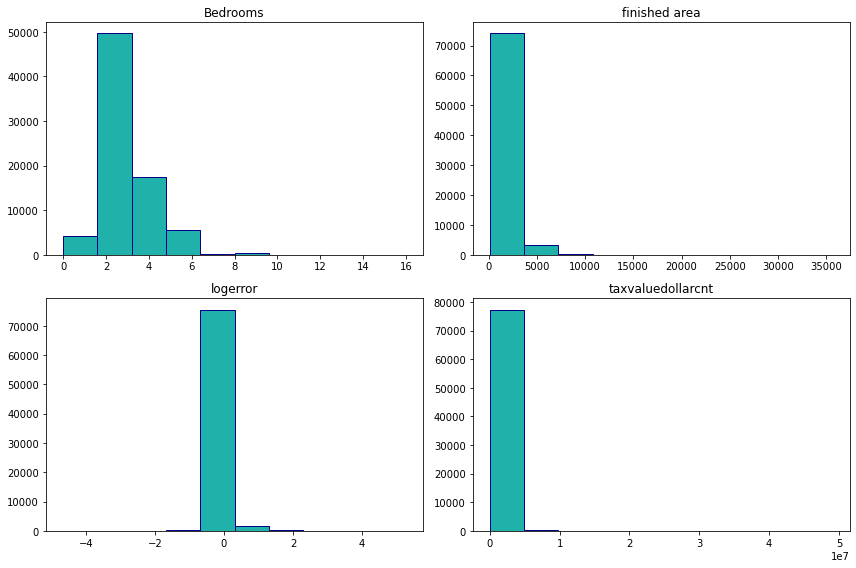

In [17]:
# plot some distributions 

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(df.bedroomcnt, color='lightseagreen', edgecolor = 'darkblue')
plt.title('Bedrooms')



plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet, color='lightseagreen', edgecolor = 'darkblue')
plt.title('finished area')



plt.subplot(223)
plt.hist(df.logerror, color='lightseagreen', edgecolor = 'darkblue')
plt.title('logerror')



plt.subplot(224)
plt.hist(df.taxvaluedollarcnt, color='lightseagreen', edgecolor = 'darkblue')
plt.title('taxvaluedollarcnt')

plt.tight_layout();

In [19]:
# #drop columns with > 50% nulls
# threshold = int(0.5 * len(df.index)) # Require that many non-NA values.
# df.dropna(axis = 1, thresh = threshold, inplace = True)
# df.head()

In [18]:
df.isnull().sum()/df.shape[0]

id                         0.000
parcelid                   0.000
airconditioningtypeid      0.678
architecturalstyletypeid   0.997
basementsqft               0.999
                            ... 
buildingclassdesc          1.000
heatingorsystemdesc        0.361
propertylandusedesc        0.000
storydesc                  0.999
typeconstructiondesc       0.997
Length: 68, dtype: float64

In [24]:
#Save SQL data to CSV on local drive

df.to_csv("zillow.csv")

# read the previously saved csv file
df = pd.read_csv("zillow.csv")

In [20]:
# #drop rows with > 50% nulls
# threshold = int(0.5 * len(df.columns)) # Require that many non-NA values.
# df.dropna(axis = 0, thresh = threshold, inplace = True)

# df

3.  Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an attribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

Example: 

In [19]:
df.isnull().sum()/df.shape[0]


id                         0.000
parcelid                   0.000
airconditioningtypeid      0.678
architecturalstyletypeid   0.997
basementsqft               0.999
                            ... 
buildingclassdesc          1.000
heatingorsystemdesc        0.361
propertylandusedesc        0.000
storydesc                  0.999
typeconstructiondesc       0.997
Length: 68, dtype: float64

In [27]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = (num_missing / rows) *100
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [28]:
nulls_by_col = nulls_by_col(df)
nulls_by_col.sort_values(by="percent_rows_missing", ascending=False).head(40)



,number_missing_rows,percent_rows_missing
buildingclassdesc,77560,99.981
buildingclasstypeid,77560,99.981
finishedsquarefeet13,77533,99.946
storytypeid,77525,99.936
basementsqft,77525,99.936
storydesc,77525,99.936
yardbuildingsqft26,77505,99.910
fireplaceflag,77403,99.778
architecturalstyletypeid,77369,99.734
architecturalstyledesc,77369,99.734


In [30]:
rows = df.shape[0]
nulls = pd.DataFrame(df.isnull().sum())
nulls.columns = ['null_count']
nulls['null_percentage'] = (nulls / rows) * 100
nulls

,null_count,null_percentage
id,0,0.000
parcelid,0,0.000
airconditioningtypeid,52569,67.765
architecturalstyletypeid,77369,99.734
basementsqft,77525,99.936
...,...,...
buildingclassdesc,77560,99.981
heatingorsystemdesc,28005,36.101
propertylandusedesc,0,0.000
storydesc,77525,99.936


4.  Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [26]:
def cols_missing(df):
    df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
    return df2

cols_missing = cols_missing(df)
cols_missing

,num_cols_missing,num_rows,pct_cols_missing
0,23,2,0.338
1,24,13,0.353
2,25,24,0.368
3,26,65,0.382
4,27,316,0.397
5,28,457,0.412
6,29,5285,0.426
7,30,3465,0.441
8,31,9911,0.456
9,32,12606,0.471


## Prepare -- corrected following walkthrough

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [34]:
# check value counts for unitcnt
df.unitcnt.value_counts(dropna = False)

1.000      47413
nan        26872
2.000       2031
4.000        726
3.000        529
45.000         1
6.000          1
237.000        1
42.000         1
Name: unitcnt, dtype: int64

#### Narrowing the dataframe to single unit properties -- this code is directly from the walkthrough

In [38]:
#Find any properties that might be considered single unit, but not specifically marked as single unit (to try to capture some of those 26,872 nans)

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
    
    
# Restrict df to only those properties with at least 1 bath & bed and >350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]

df.shape

(71356, 68)

# START RIGHT HERE ^^^^

**2.  Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).**

**The input:**
- A dataframe
- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

**The output:**
- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

**hint:**
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
- Make use of inplace, i.e. inplace=True/False.

**3.  Decide how to handle the remaining missing values:**

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

**wrangle_zillow.py**

-Functions of the work above needed to acquire and prepare a new sample of data.

## Mall Customers

**1. Acquire data from mall_customers.customers in mysql database.**

In [25]:

def acquire(df):
    '''
    This function connects to Codeup's SQL Server using given parameters in the user's
    env file.  It then uses a SQL query to acquire all data from the mall customers database 
    It returns all the data in a single dataframe called df.
    '''
    
    def get_connection(db, user=env.user, host=env.host, password=env.password):
         return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    query = '''
            SELECT *
            FROM customers 
            '''

    df = pd.read_sql(query, get_connection('mall_customers'))
    
    return df

mall = acquire('mall_customers')
mall.head(2)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81


**2. Summarize data (include distributions and descriptive statistics).**

### Takeaways:
Database is 5 columns x 200 row
index is reset to customer_id

In [26]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
mall.shape

(200, 5)

In [28]:
df.set_index('customer_id')

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [29]:
mall.describe()


,customer_id,age,annual_income,spending_score
count,200.000,200.000,200.000,200.000
mean,100.500,38.850,60.560,50.200
std,57.879,13.969,26.265,25.824
min,1.000,18.000,15.000,1.000
25%,50.750,28.750,41.500,34.750
50%,100.500,36.000,61.500,50.000
75%,150.250,49.000,78.000,73.000
max,200.000,70.000,137.000,99.000


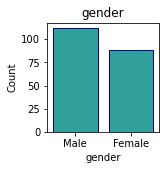

        gender  Count  Percent
Female    Male    112   56.000
Male    Female     88   44.000
_________________________________________________________________


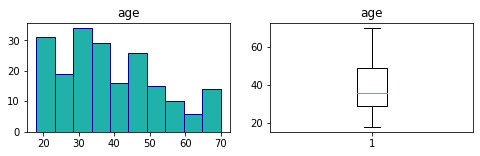

count   200.000
mean     38.850
std      13.969
min      18.000
25%      28.750
50%      36.000
75%      49.000
max      70.000
Name: age, dtype: float64


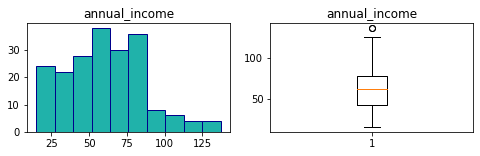

count   200.000
mean     60.560
std      26.265
min      15.000
25%      41.500
50%      61.500
75%      78.000
max     137.000
Name: annual_income, dtype: float64


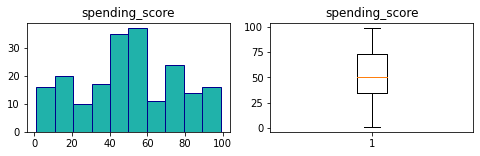

count   200.000
mean     50.200
std      25.824
min       1.000
25%      34.750
50%      50.000
75%      73.000
max      99.000
Name: spending_score, dtype: float64


In [35]:
# create histograms to visualize distribution of each variable.  
cat_vars = ['gender']
quant_vars = ['age', 'annual_income', 'spending_score']

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen', edgecolor = 'darkblue')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen', edgecolor = 'darkblue')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats


    


def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)
        
explore_univariate(mall, cat_vars, quant_vars)



### Takeaways:
- Contains 200 customers, 5 features
- No nulls
- index is reset to customer_id
- mean age of customers is 39, minimum age is 18, max is 70
- mean annual income is $60.5 K
- Data contains a spending score from 1-99
- Avg. spending score is 50.2 with a standard deviation of 25.8

3. Detect outliers using IQR.

4. Split data (train, validate, and test split).

5. Encode categorical columns using a one hot encoder (pd.get_dummies).

6. Handles missing values.

7. Scaling